## Convert documents from sentences to full-text articles

In [2]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import os
import re

In [161]:
def clean_words(x):
        words = []
        for i, w in enumerate(x):
                if w == '.':
                        if len(words)>0:
                                words[i-1] += '.'
                else:
                        words.append(w.strip())
        return words
path = 'data/sentences_nlp352'
nlp_sentences = pd.read_csv(path, 
                            sep='\t',
                            names = ['gddid', 
                                    'sentid',
                                    'wordidx',
                                    'words',
                                    'part_of_speech',
                                    'special_class',
                                    'lemmas',
                                    'word_type',
                                    'word_modified'], 
                            usecols = ['gddid', 'sentid', 'words'])

nlp_sentences =nlp_sentences.replace('"', '', regex = True)\
                            .replace('\{', '', regex = True)\
                            .replace('}', '', regex = True)\
                            .replace(',', ',', regex = True)\
                            .replace(r'\W{4,}', '', regex=True)\
                            .replace(',,,', 'comma_sym', regex=True)\
                            .replace(',', ' ', regex=True)\
                            .replace('comma_sym', ', ', regex=True)\
                            .replace('-LRB- ', '(', regex=True)\
                            .replace('-LSB- ', '[', regex=True)\
                            .replace('LRB', '(', regex=True)\
                            .replace('LSB ', '[', regex=True)\
                            .replace('-RRB-', ')', regex=True)\
                            .replace('-RSB-', ']', regex=True)\
                            .replace('RRB', ')', regex=True)\
                            .replace('RSB', ']', regex=True)\
                            .replace('-RRB', ')', regex=True)\
                            .replace('-RSB', ']', regex=True)
nlp_sentences['words']= nlp_sentences['words'].str.split(" ")
# # Sentences - not words.
nlp_sentences['words'] = nlp_sentences['words'].apply(clean_words)
nlp_sentences['sentence'] = nlp_sentences['words'].apply(lambda x: ' '.join(map(str, x)))

# # REGEX Values
# #Returns a boolean value, whether the coordinates are present in the sentence or not
# nlp_sentences = utils.find_regex(nlp_sentences, find_val = 'dms_regex',\
#                             search_col = 'sentence', new_col_name = 'dms_re')
# nlp_sentences = utils.find_regex(nlp_sentences, find_val = 'dd_regex',\
#                             search_col = 'sentence', new_col_name = 'dd_re')
# nlp_sentences = utils.find_regex(nlp_sentences, find_val = 'digits_regex',\
#                             search_col = 'sentence', new_col_name = 'digits_re')

# # NLP Taks
# stop = stopwords.words('english')
# tokenizer = nltk.RegexpTokenizer(r"\w+")
# stemmer = SnowballStemmer("english")

# nlp_sentences['nltk'] = nlp_sentences.apply(lambda row: tokenizer.tokenize(row['sentence']), axis=1)
# nlp_sentences['nltk']=nlp_sentences['nltk'].apply(lambda x: [item for item in x if item not in stop])
# nlp_sentences['nltk']=nlp_sentences['nltk'].apply(lambda x: [stemmer.stem(y) for y in x])
    # nlp_sentences = nlp_sentences[['gddid', 'sentid', 'sentence', 'nltk', 'dms_re', 'dd_re', 'digits_re']]
    
    # return nlp_sentences


                      gddid  sentid  \
0  54b4325de138239d8684d7e0       1   
1  54b4325de138239d8684d7e0       2   
2  54b4325de138239d8684d7e0       3   
3  54b4325de138239d8684d7e0       4   
4  54b4325de138239d8684d7e0       5   

                                               words  
0  {LES,DISTORSIONS,DE,L'ENREGISTREMENT,POLLINIQU...  
1  {-LRB-,de,-RRB-,",",PONEL,Ph.,&,REILLE,M.,1997,.}  
2  {Les,distorsions,de,l'enregistrement,polliniqu...  
3  {-LSB-,Distorsions,in,the,pollen,record,of,veg...  
4              {GEOBIOS,",",M.S.,n,°,21,:,195-202,.}  


In [158]:
y = nlp_sentences.groupby("gddid")['sentence'].agg(lambda x: ' '.join(x)).reset_index()

In [49]:
y

,gddid,sentence
0,54b43244e138239d8684933b,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
1,54b43245e138239d8684949c,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
2,54b43245e138239d86849568,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
3,54b43246e138239d868497cd,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
4,54b43246e138239d86849975,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
...,...,...
291,575f018acf58f15e86632077,ARTICLE IN PRESS Quaternary International 200 ...
292,576109decf58f12b157b772e,148 Abstracts / Quaternary International 279-2...
293,57611ef7cf58f130993e9b1c,"Palaeogeography, Palaeoclimatology, Palaeoecol..."
294,576161c4cf58f141254fd03f,"Palaeogeography, Palaeoclimatology, Palaeoecol..."


In [159]:
for row in y.iterrows():
    with open(f"data/raw_text/" + row[1]['gddid'] + '.txt', 'w') as f:
        f.write(row[1]['sentence'])

## Check the percentage of articles that have an abstract on CrossRef

In [66]:
import requests
import json

In [60]:
neotoma = pd.read_csv("data/neotoma.csv")
neotoma.head()

,siteid,sitename,longitudeeast,latitudenorth,longitudewest,latitudesouth,altitude,area,sitedescription,notes,...,datasetid,collectionunitid,datasettypeid,datasetname,notes-2,recdatecreated-2,recdatemodified-2,embargoid,citation,doi
0,10330,Lac du Sommet,-70.66468,47.71662,-70.66573,47.71382,830.0,2.0,"The small shallow Lac du Sommet (0.02 km2, 4 m...",NaN,...,15691,11686,1,NaN,NaN,2015-04-16 19:02:13,2015-04-16 19:02:13,NaN,"Hausmann, S., I. Larocque-Tobler, P.J.H. Richa...",10.1177/0959683611400199
1,10330,Lac du Sommet,-70.66468,47.71662,-70.66573,47.71382,830.0,2.0,"The small shallow Lac du Sommet (0.02 km2, 4 m...",NaN,...,15692,11686,11,Lac du Sommet Diatom Data,NaN,2015-04-16 19:02:20,2015-04-16 19:02:20,NaN,"Hausmann, S., I. Larocque-Tobler, P.J.H. Richa...",10.1177/0959683611400199
2,1729,Myrtle Lake,-93.37853,47.98645,-93.39207,47.97876,393.0,50.0,Lake surrounded by peatland. Physiography: Red...,NaN,...,1786,1728,3,NaN,NaN,2013-09-30 14:02:42,2013-09-30 14:02:42,NaN,"Janssen, C.R. 1968. Myrtle Lake: a late- and p...",10.1139/b68-190
3,1729,Myrtle Lake,-93.37853,47.98645,-93.39207,47.97876,393.0,50.0,Lake surrounded by peatland. Physiography: Red...,NaN,...,8423,1728,1,NaN,NaN,2013-09-30 14:02:42,2013-09-30 14:02:42,NaN,"Janssen, C.R. 1968. Myrtle Lake: a late- and p...",10.1139/b68-190
4,269,Billy's Lake,-94.54948,46.27186,-94.55363,46.26930,383.0,2.5,Shallow depression on St. Croix moraine. Physi...,NaN,...,275,269,3,NaN,NaN,2013-09-30 14:02:42,2013-09-30 14:02:42,NaN,"Jacobson, G.L., Jr., and E.C. Grimm. 1986. A n...",10.2307/1939818


In [117]:
neotoma.columns

Index(['siteid', 'sitename', 'longitudeeast', 'latitudenorth', 'longitudewest',
       'latitudesouth', 'altitude', 'area', 'sitedescription', 'notes',
       'recdatecreated', 'recdatemodified', 'geog', 'datasetid',
       'collectionunitid', 'datasettypeid', 'datasetname', 'notes-2',
       'recdatecreated-2', 'recdatemodified-2', 'embargoid', 'citation',
       'doi'],
      dtype='object')

In [61]:
doi = neotoma['doi'].unique()

In [83]:
success = 0
abs = 0
for identifier in doi:
    url = f"https://api.crossref.org/works/{identifier}"
    response = requests.get(url=url)
    try:
        resp = json.loads(response.content)
    except:
        print(identifier)
        continue
    if response.status_code == 200:
        success += 1
        if "abstract" in resp['message']:
            abs += 1

10.1016/0033-5894(73)900
0.1139/e80-122
10.2458/azu_js_rc.22.599
10.1130/0091-7613(1987)​15<837:CRDOTP>​2.0.CO;2
10.1080/00040851.1991.12002842
10.1080/00040851.1981.12004259
10.1111/j.1502-3885.1997.tb00656x
10.23967/RI0048D.RI0048D
10.1080/00040851.1980.12004190
10.1038/2272
10.1139/cjfas-58-6-1222
10.1191/0959683604hl7l7rp
10.2458/azu_js_rc.53.3441
1016/j.revpalbo.2004.10.005
Palaeogeography, Palaeoclimatology, Palaeoecology
S0031-0182(01)00322-4
10.1016/j.quatscirev.2015.08.029
http://adlfi.revues.org/13544
Review of Palaeobotany and Palynology, 133(1-2):115-133.
10.1073pnas.0408315102
10.1126/science.1067814. PMID:11910112
10.1126/science.154.3745.15
10.1111/j.1365-2699.2012.02770.x.
10.1016/J.CRTE.2013.03.00.
10.1016/j.quascirev.2016.09.023.
10.2112/08A-0005
10.1007/s00334-012-0380-0.
10.1038/NGEO1924.
DOI: 10.1007/s00334-015-0545-8.
DOI: 10.1177/0959683615594242.
10.1016/j.paleo.2009.08.008


In [88]:
abs/success

0.324585635359116

In [74]:
z = json.loads(response.content)
"abstract" in z['message']

True

In [111]:
def preprocessed_bibliography(path="data/bibjson"):
    """
    Loads and formats bibliography json file and converts to a dataframe

    Parameters
    ----------
    path : string
        Path where the bibliography database is stored.

    Returns
    -------
    bibliography: pd.DataFrame
        pd.DataFrame with all bibliography information
    """
    with open(path, 'r') as f:
        bib_dict = json.load(f)
        
    # Normalizing data so that we have access to the 'identifier'
    # print([elem.update({'identifier':[{'_type':None,'_id':None}]}) for elem in bib_dict if 'identifier' not in elem.keys()])
    # print(bib_dict)
    # bibliography = pd.json_normalize(bib_dict,
    #                             # 'identifier',
    #                             # ['publisher', 'title',
    #                             # ['journal', 'name', 'name'],
    #                             ['author'],
    #                             # 'year', 'number', 'volume',
    #                             ['link'], 
    #                             # '_gddid', 'type', 'pages'],
    #                             record_prefix='_',
    #                             errors='ignore')
    # print(bibliography.columns)
    # print(bibliography.head())
    # bibliography['link'] = bibliography['link'].astype(str)

    # url = bibliography['link'].str.split(", ", expand=True)

    # bibliography['link_url'] = url[0]
    # bibliography['link_type'] = url[1]

    # bibliography['link_url'] = bibliography['link_url']\
    #     .replace(r"\[{'url': '", "", regex=True)\
    #     .replace("'", "", regex=True)

    # bibliography['link_type'] = bibliography['link_type']\
    #     .replace("'type': '", "", regex=True)\
    #     .replace("'}]", "", regex=True)

    # bibliography['author'] = bibliography['author'].astype(str)
    # bibliography['author'] = bibliography['author']\
    #     .replace(r"\[{'name': '", "", regex=True)\
    #     .replace("{'name': '", "", regex=True)\
    #     .replace("'},", ";", regex=True)\
    #     .replace("'}]", "", regex=True)

    # bibliography = bibliography[['type', 'id', 'publisher', 'title',
    #                              'journal.name',
    #                              'author',
    #                              'year', 'number', 'volume',
    #                              '_gddid', 'type', 'pages',
    #                              'link_url', 'link_type']]

    # bibliography = bibliography.rename(columns={'_id': 'doi', '_gddid':'gddid'})

    return bib_dict


In [112]:
bib = preprocessed_bibliography()

In [115]:
nlp_sentences

,gddid,sentid,words,sentence
0,54b4325de138239d8684d7e0,1,[LES DISTORSIONS DE L'ENREGISTREMENT POLLINIQU...,LES DISTORSIONS DE L'ENREGISTREMENT POLLINIQUE...
1,54b4325de138239d8684d7e0,2,[(de -)PONEL PhREILLE M. 1997 .],(de -)PONEL PhREILLE M. 1997 .
2,54b4325de138239d8684d7e0,3,[Les distorsions de l'enregistrement polliniqu...,Les distorsions de l'enregistrement pollinique...
3,54b4325de138239d8684d7e0,4,[-LSB- Distorsions in the pollen record of veg...,-LSB- Distorsions in the pollen record of vege...
4,54b4325de138239d8684d7e0,5,"[GEOBIOS, M.S. n ° 21 : 195-202 .]","GEOBIOS, M.S. n ° 21 : 195-202 ."
...,...,...,...,...
178292,557c9e16e1382390b43c7c0f,1087,[A diatom-phosphorus transfer function for Alp...,A diatom-phosphorus transfer function for Alpi...
178293,557c9e16e1382390b43c7c0f,1088,"[Memoty Institute Italy Idrobiology 53, 8599 .]","Memoty Institute Italy Idrobiology 53, 8599 ."
178294,557c9e16e1382390b43c7c0f,1089,"[Wunsam, SSchmidt, RKlee, R1995 .]","Wunsam, SSchmidt, RKlee, R1995 ."
178295,557c9e16e1382390b43c7c0f,1090,[Cyclotella-taxa (Bacillariophyceae) in lakes ...,Cyclotella-taxa (Bacillariophyceae) in lakes o...


# EDA

In [4]:
import os
import matplotlib
import pandas as pd

In [2]:
prefix = "data/raw_text"
files = os.listdir(prefix)
lens = []
for f in files:
    with open(f"{prefix}/{f}", 'r') as file:
        sent = file.readlines()
        lens.append(len(sent[0].split(' ')))

## Sentence Lengths

<Axes: >

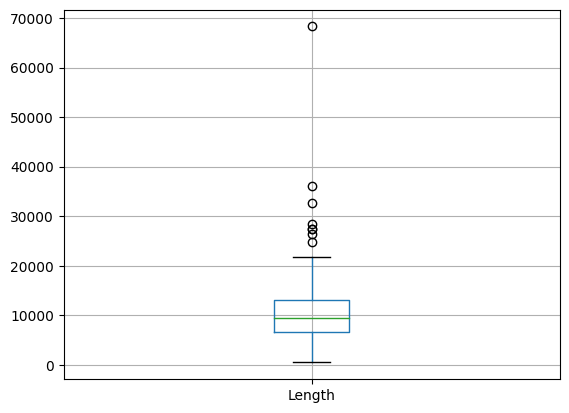

In [7]:
counts = pd.DataFrame(lens, columns=['Length'])
counts.boxplot()

## Year of publishing

In [27]:
from collections import Counter
import json
import matplotlib.pyplot as plt

year_counts = Counter()
publisher_counts = Counter()
articles = json.load(open("data/bibjson", 'r'))
for art in articles:
    year_counts[art['year']] += 1
    publisher_counts[art['publisher']] += 1

In [28]:
publisher_counts

Counter({'Elsevier': 214,
         'SEPM': 3,
         'Wiley': 68,
         'Canadian Science Publishing': 9,
         'USGS': 5,
         'GSA': 1})

In [24]:
x = pd.DataFrame({
    "count": list(counts.values())
    }, index=list(counts.keys())).sort_index()

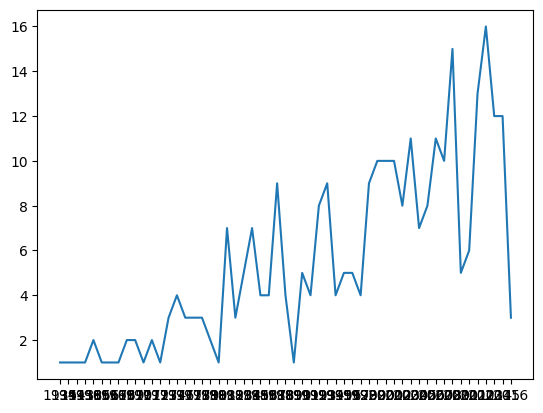

In [26]:
plt.plot(x)

# Pattern of subheadings for all publishers

- X.Y HEADING
- Acknowedgements
- Sometimes, there are no section left, so in those cases, come up with a number of instead
- Summary
- Method
- Site description
- Interpretation
- Results
- Background
- Discussion
- OBJECTIVES
- Conclusion
- References

# Splitting training files by sections

In [9]:
section_pattern = r"[1-9]\.[1-9][0-9]\.? [A-Z][a-zA-Z]{3,}"
patterns = ["Introduction", "Abstract", "Material And Method", "Site Description", "Interpretation", "Results", "Background", "Discussion", "Objectives", "Conclusion"]
endwords = ["Acknowledgement", "Reference"]

In [26]:
prefix = "data/raw_text"
char_len = 3000
min_len = 900
total = []
sent_len = []
files = os.listdir(prefix)

for fin in files:
    with open(f"{prefix}/{fin}", 'r') as f:
        article = f.readlines()[0]
        chunks = []
        chunk_subsection = []
        chunk_local = []
        section_names = []
        indices = []
        local = 0
        subsection = None
        
        # Look for a sections
        matches = re.finditer(section_pattern, article)
        for match in matches:
            indices.append(match.start())
            section_names.append(match.group())
        
        # Divide the article into sections
        sections = []
        if len(indices) > 0:
            fin_indices = [0, indices[0]]
            last = 0 # Index of the last index added 
            
            # Add indices if they are far away
            for i in range(1, len(indices)):
                if indices[i] - indices[last] < char_len:
                    continue
                else:
                    fin_indices.append(indices[i])
                    last = i

            for i in range(len(fin_indices)-1):
                sections.append(article[fin_indices[i] : fin_indices[i+1]])
                
            sections.append(article[fin_indices[-1] : ])
            
        else:
            # The entire article is considered as a single section
            sections.append(article)
            section_names.append("")
        
        for num, sec in enumerate(sections):
            local = 0
            # If the section length is small, add the entire section as a chunk
            if len(sec) < char_len:
                chunks.append(sec)
                chunk_subsection.append(sec.split(" ")[0])
                chunk_local.append(local)
            else:
                # If it is very long, then split the section based on headers
                cur_para = ""        
                sentences = sec.split('. ')
                
                for si, sent in enumerate(sentences):
                    sent_len.append(len(sent))
                    
                    if subsection == None:
                        subsection = sent.split(" ")[0]
                        
                        
                    # If the paragraph is long enough, add it as a chunk
                    # If the next sentence is very long, add the current paragraph as a chunk and reset cur_para
                    if len(cur_para) > char_len or len(sent) > char_len:
                        chunks.append(cur_para.strip())
                        chunk_subsection.append(subsection)
                        chunk_local.append(local)
                        cur_para = ""
                        local += 1
                    
                    check=True
                    for pat in patterns:
                        # If there is a pattern present:
                        # then everything before the pattern goes in the current para
                        # Text starting from the pattern goes in the next para after
                        if pat in sent or pat.upper() in sent:
                            try:
                                index = sent.index(pat)
                            except ValueError:
                                index = sent.index(pat.upper())
            
                            cur_para += sent[:index]
                            
                            if len(cur_para) > min_len:
                                chunks.append(cur_para.strip())
                                chunk_subsection.append(subsection)
                                chunk_local.append(local)
                                subsection = pat
                                local = 0
                                cur_para = sent[index: ] + '. '
                            else:
                                cur_para += sent[index: ] + '. '
                                
                            check = False
                            break
                            
                    end=False
                    # Check if there is an endwords
                    for pat in endwords:
                        if pat in sent or pat.upper() in sent:
                            end=True
                            break
                    if end:
                        break
                    
                    # If no pattern or ending condition is present in the current sentence, then add it to the current para
                    if check:
                        cur_para += sent + ". "
                if len(cur_para) > 0:
                    chunks.append(cur_para.strip())
                    chunk_subsection.append(subsection)
                    chunk_local.append(local)

        total.extend([len(i) for i in chunks])

In [18]:
counts = pd.DataFrame(sent_len, columns=['Length'])
counts.boxplot()

<Axes: >

In [19]:
chunk_sizes = [i for i in total]
total_chunks = pd.DataFrame({"length": chunk_sizes})
total_chunks.plot.hist(bins=40)

<Axes: ylabel='Frequency'>

In [20]:
counts = pd.DataFrame(sent_len, columns=['Length'])
counts.boxplot()

<Axes: ylabel='Frequency'>

In [21]:
chunk_sizes = [i for i in total]
total_chunks = pd.DataFrame({"length": chunk_sizes})
total_chunks.plot.hist(bins=40)

<Axes: ylabel='Frequency'>

In [27]:
chunks

['Russian Geology and Geophysics 49 (2008 ) 978985 www.elsevier.com/locate/rgg Climatic changes and alluvial-sedimentation settings in southeastern Transbaikalia in the Middle-Late Holocene (by the example of the Ilya floodplain ) V.B. Bazarova aL.M. Mokhova a, M.A. Klimin b, L.A. Orlova c, K.Yu. Bazarov a a Pacific Institute of Geography, Far Eastern Branch of the RAS, 7 ul. Radio, Vladivostok, 690041 Russia b Institute of Water and Ecological Problems, Far Eastern Branch of the RAS, 65 ul. Kim Yu Chena, Khabarovsk, 680000 Russia c Institute of Geology and Mineralogy, Siberian Branch of the RAS, 3 prosp. Akad. Koptyuga, Novosibirsk, 630090 Russia Received 26 November 2007 ; accepted 27 March 2008 Abstract Climatic changes in southeastern Transbaikalia in the Middle and Late Holocene and their influence on alluvial sedimentation environments are reconstructed from the results of study of the Ilya floodplain sediments (Alkhanai National Park ). At the beginning of the Subboreal period, 

In [265]:
# for i, chunk in enumerate(chunks):
#     with open(f'train_files/gddid_{global_index[i]}_{subsection[i]}_{local_index[i]}.txt', 'w') as fin:
#         fin.write(chunk)